In [5]:
import pandas as pd
import matplotlib.style as mplstyle

from funcs import *

mplstyle.use(['ggplot', 'fast'])

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Part c) Writing your own gradient descent code

* Replace analytical expressions for the optimal parameters with gradient descent
* Fixed learning rate
* Study and compare results to a) and b).
* Discuss the role of the learning rate

In [12]:
def gradient_descent(X, y, eta=0.1, n_iters=1000, lamb=0):
    ''' 
    Lambda = 0 -> OLS
    '''

    tol = 1e-8

    n_samples, n_features = X.shape
    theta = np.random.randn(n_features, 1)  # First guess

    mse_history = np.zeros(n_iters)  # For storing MSE

    for i in range(n_iters):
        grad = (2/n_samples) * X.T @ (X @ theta - y) + 2 * lamb * theta
        new_theta = theta - eta*grad
        if np.linalg.norm(new_theta - theta) < tol:
            #print(f'Breaking loop at iteration number: {i}')
            break
        theta = new_theta

        mse = MSE(y_data=y, y_pred=X @ theta)
        mse_history[i] = mse
    
    return theta, mse_history

In [13]:
# Chosen parameters for GD analysis
p_val = 5  # polynomial degree
lamb = 0.1 # hyperparameter
n_val = 200. # number of datapoints

In [14]:
# Gradient descent for OLS
# 10 data points
x, y = make_data(n=10)
X = polynomial_features(x, p_val, intercept=True)
X, y = standardize(X, y)
X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)
gd_OLS_theta_n10, gd_OLS_mse_n10 = gradient_descent(X_train, y_train)

# 100 data points
x, y = make_data(n=100)
X = polynomial_features(x, p_val, intercept=True)
X, y = standardize(X, y)
X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)
gd_OLS_theta_n100, gd_OLS_mse_n100 = gradient_descent(X_train, y_train)

In [15]:
# Gradient descent for Ridge
# 10 data points
x, y = make_data(n=10)
X = polynomial_features(x, p_val, intercept=False)
X, y = standardize(X, y)
X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)
gd_Ridge_theta_n10, gd_Ridge_mse_n10 = gradient_descent(X_train, y_train, lamb=lamb)

# 100 data points
x, y = make_data(n=100)
X = polynomial_features(x, p_val, intercept=False)
X, y = standardize(X, y)
X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)
gd_Ridge_theta_n100, gd_Ridge_mse_n100 = gradient_descent(X_train, y_train, lamb=lamb)

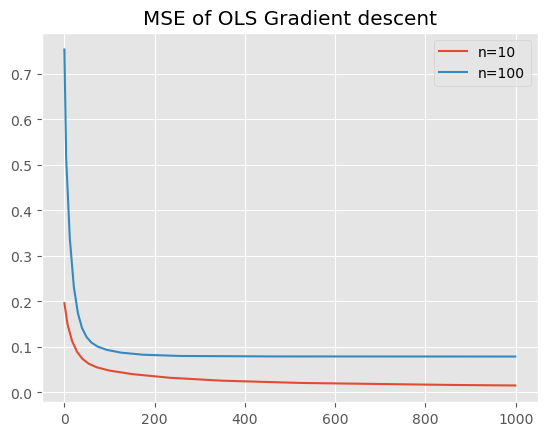

In [19]:
plt.plot(gd_OLS_mse_n10, label='n=10')
plt.plot(gd_OLS_mse_n100, label='n=100')
plt.title('MSE of OLS Gradient descent')
plt.legend()

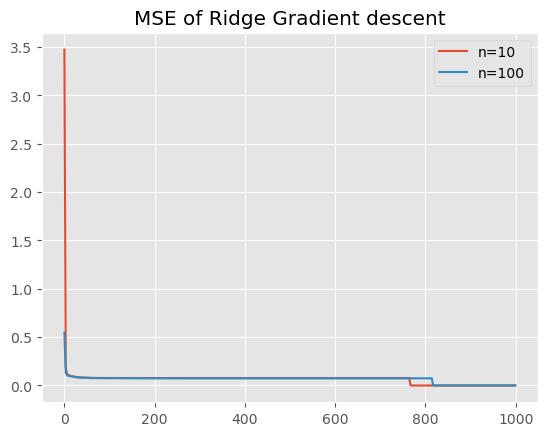

In [20]:
plt.plot(gd_Ridge_mse_n10, label='n=10')
plt.plot(gd_Ridge_mse_n100, label='n=100')
plt.title('MSE of Ridge Gradient descent')
plt.legend()

Funksjoner jeg klippa ut av functions.py:

In [ ]:
def polynomial_features(x, p, intercept=True):
    '''
    Generate a design matrix X.

    Parameters:
        x: dataset
        p: number of features
        intercept: adds a column of intercept if set to True

    Returns:
        X: design matrix with dimensions
             (n, p) if intercept=False or (n, p+1) if intercept=True
    '''
    n = len(x)

    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1  # adds intercept
        for i in range(1, p + 1):
            X[:, i] = x ** i
    else:
        X = np.zeros((n, p))
        for i in range(0, p):
            X[:, i] = x ** (i + 1)

    return X 

def standardize(X, y):
    '''
    Scale and standardize a design matrix X and data y.

    Parameters:
        X: np.ndarray
        y: np.ndarray
    
    Returns:
        X_norm: np.ndarray
        y_centered: np.ndarray
        
    '''
    X_mean = X.mean(axis=0) # The mean of each column/feature
    X_std = X.std(axis=0)
    X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
    X_norm = (X - X_mean) / X_std

    # Center the target to zero mean
    y_mean = y.mean()
    y_centered = y - y_mean

    return X_norm, y_centered

def MSE(y_data, y_pred):
    ''' 
    Mean square error
    '''
    mse = np.mean((y_data - y_pred)**2)

    return mse

def R2(y_data, y_pred):
    '''
    R^2 score
    '''
    numerator = np.sum((y_data - y_pred)**2)
    denumerator = np.sum((y_data - np.mean(y_data))**2)

    if denumerator == 0:
        r2 = np.nan
    else:
        r2 = 1 - numerator/denumerator
    
    return r2